# Load the libraries

In [1]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Load the data-set

In [2]:
df=pd.read_csv("test.csv")

In [3]:
data=pd.read_csv("train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Manual checking

## Messy data 

**1-** Missing Values in age col **2-** Combine Sib & parch and make a family col **3-** Ticket are in messy form **4-** Missing values in cabin col **5-** Cabin are also  in dirty form **7-** Missing values in Embarked col

# Programatic Checking

### See the basic information of data

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Check Null & duplicates values

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.duplicated().sum()

0

## Now check basic statistic
### Categorical Col

## Conclussion
**1-** Fare col contain the whole family fare
**2-** Extract the Family title in Name col

In [8]:
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
data[data["Name"]=="Braund, Mr. Owen Harris"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [10]:
data[data["Sex"]=="male"]["Sex"].value_counts()

Sex
male    577
Name: count, dtype: int64

In [11]:
data[data["Ticket"]=="347082"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [12]:
data[data["Cabin"]=="B96 B98"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0,B96 B98,S
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0,B96 B98,S


In [13]:
data[data["Embarked"]=="S"]["Embarked"].value_counts()

Embarked
S    644
Name: count, dtype: int64

# Num Col

## Conclussion
**Sib sp col contain the Individual fare** 

In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(data[data["Survived"]==1]["Survived"].value_counts()/len(data["Survived"])*100)
print(data[data["Survived"]==0]["Survived"].value_counts()/len(data["Survived"])*100)

Survived
1    38.383838
Name: count, dtype: float64
Survived
0    61.616162
Name: count, dtype: float64


In [16]:
data[data["SibSp"]==8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
data[data["Parch"]==6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [18]:
data[data["Fare"]==512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


# Changing the Data types

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
for i in data.describe(include="object").columns:
    l=["Sex","Embarked"]
    if i in l:
        data[i]=data[i].astype("category")

In [21]:
data["Pclass"]=data["Pclass"].astype("int16")

In [22]:
data["Survived"]=data["Survived"].astype("int16")

In [23]:
data["PassengerId"]=data["PassengerId"].astype("int16")

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int16   
 1   Survived     891 non-null    int16   
 2   Pclass       891 non-null    int16   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(2), float64(2), int16(3), int64(2), object(3)
memory usage: 56.1+ KB


# Saperate the num and catagorical col

Num Col => ["PassengerId","Age","Fare"]
Cat Col => ["Survived","Pclass","Name",'Sex',"SibSp","Parch","Ticket","Cabin","Embarked"]

In [25]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


# Univariate Analysis

**Num Col**

## Conclussion Age 

In [26]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

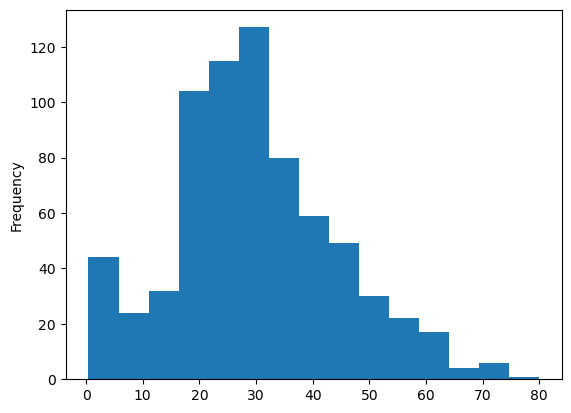

In [27]:
data["Age"].plot(kind="hist",bins=15)

In [28]:
data[(data["Age"]>0)& (data["Age"]<6)].shape[0]

44

<Axes: ylabel='Density'>

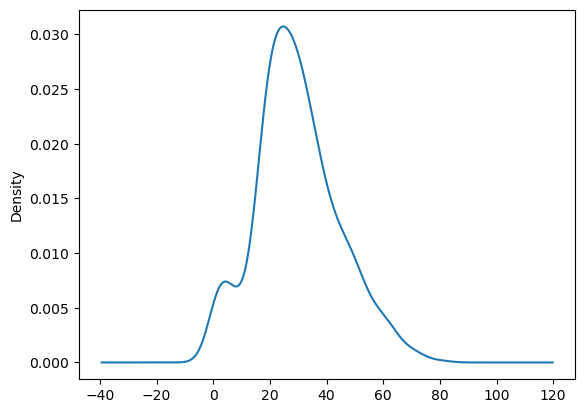

In [29]:
data["Age"].plot(kind="kde")

<Axes: >

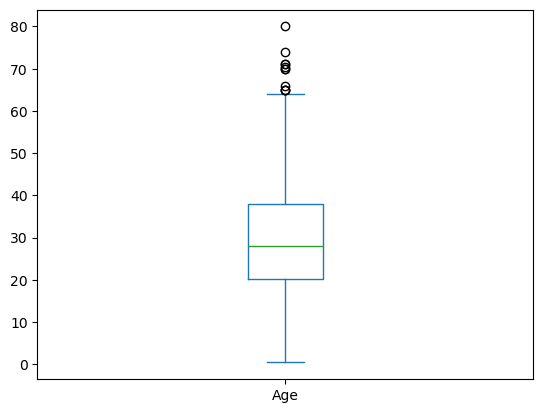

In [30]:
data["Age"].plot(kind="box")

In [31]:
data[data["Age"]>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


# Conclussion Fare
**1-** Highly positiv skewed
**2-** Not individula fare

In [32]:
data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
data[data["Fare"]== 512.329200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [34]:
df[df["Fare"]== 512.329200]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


<Axes: ylabel='Frequency'>

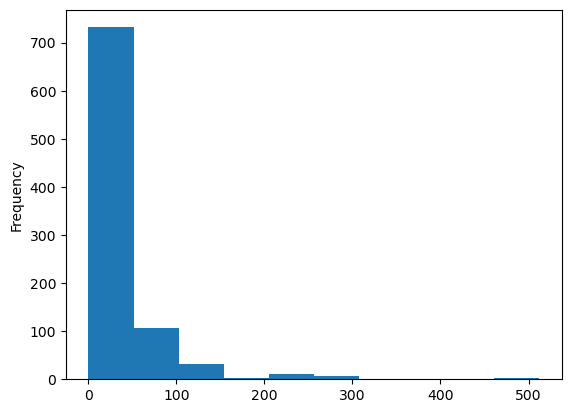

In [35]:
data["Fare"].plot(kind="hist")

In [36]:
data["Fare"].skew()

4.787316519674893

<Axes: ylabel='Density'>

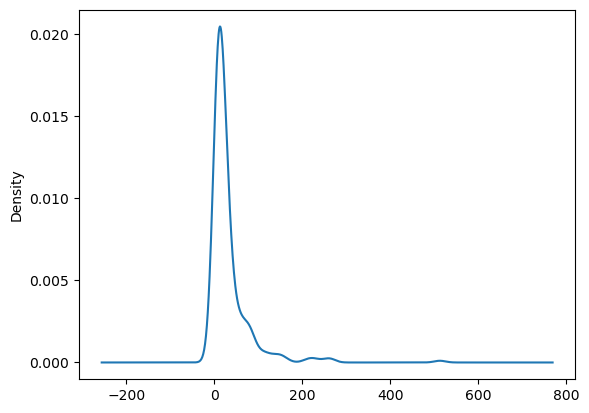

In [37]:
data["Fare"].plot(kind="kde")

<Axes: >

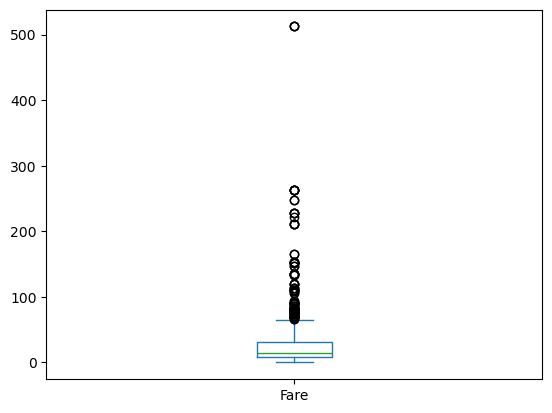

In [38]:
data["Fare"].plot(kind="box")

# Cat Col
**Survived**

**Died rate is high than survived**

In [39]:
data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

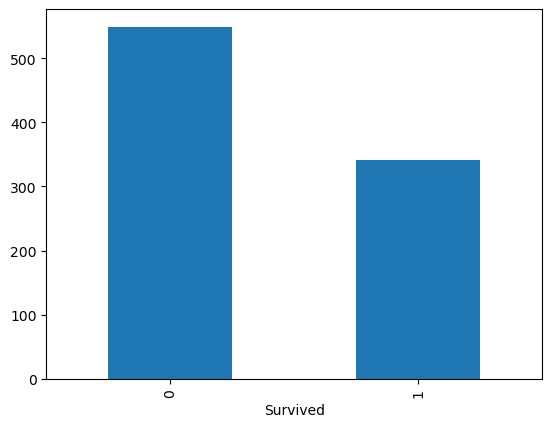

In [40]:
data["Survived"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

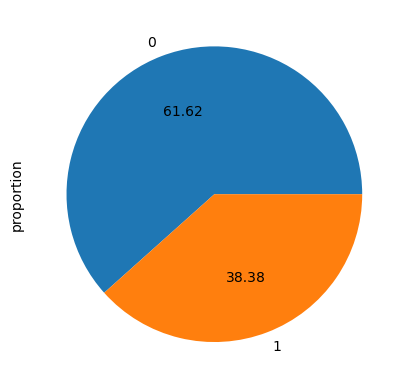

In [41]:
data["Survived"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

In [42]:
data["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

# Pclass

## Conclussion
**1-** Most of the people travel in pclass3. **2-** less mounts of people travel in pclass 2  

**3-** It is not good b/c Generally most of the people travel in pclass 1

In [43]:
data["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

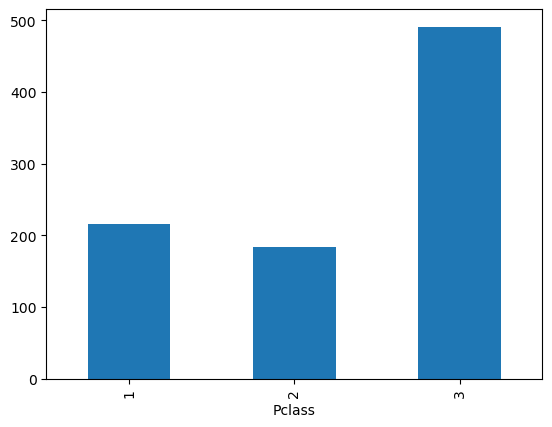

In [44]:
data["Pclass"].value_counts().sort_index().plot(kind="bar")

In [45]:
data['Pclass'].value_counts(normalize=True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

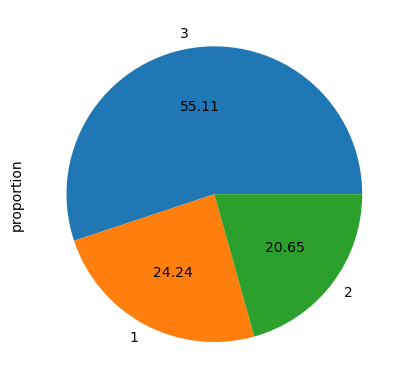

In [46]:
data['Pclass'].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

# Sex
## Conclussion
**Male Distrubtion is greater than female**

In [47]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

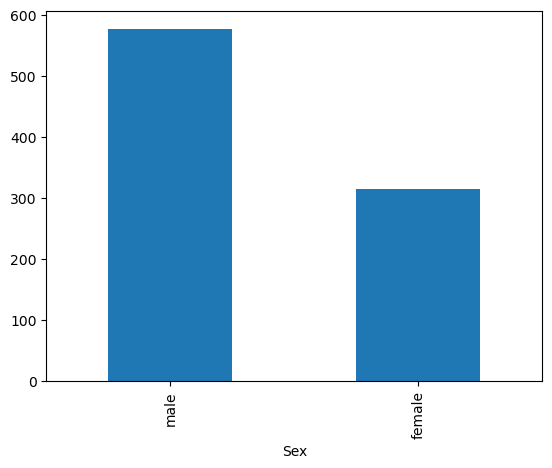

In [48]:
data["Sex"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

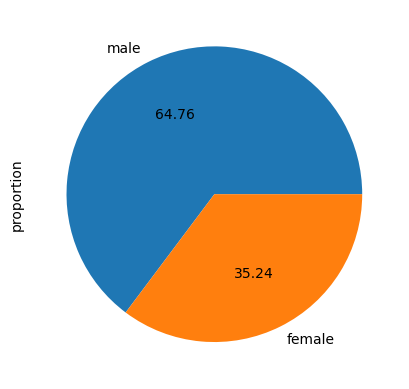

In [49]:
data["Sex"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

# Embarked
## conclussion
**Most of the people enter in Sounthamtan**

In [50]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

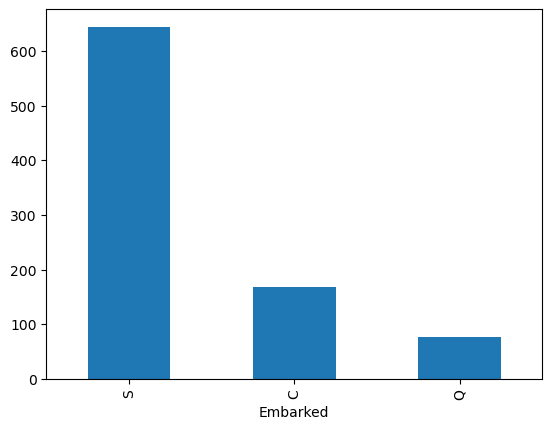

In [51]:
data["Embarked"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

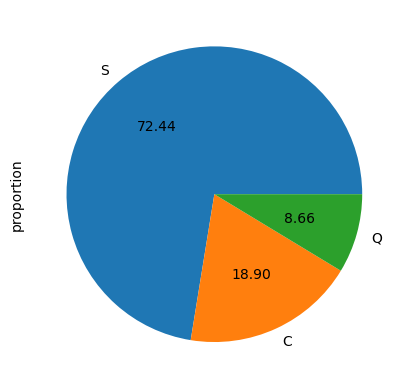

In [52]:
data["Embarked"].value_counts(normalize=True).plot(kind="pie",autopct="%.2f")

# Bivariate Analysis

## Cat to Cat 

### Survived and Pclas
## Conclussion
**1-**Most of the People Died on Pclass 3 **2-** Most of the people survived in pclass 1

In [53]:
pd.crosstab(data["Survived"],data["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Text(0.5, 1.0, 'Survived Vs Pclass')

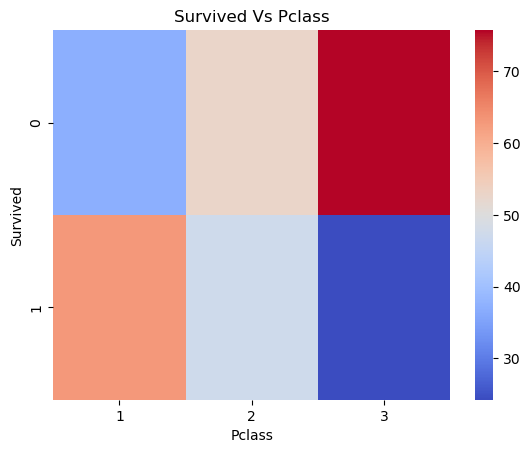

In [54]:
sns.heatmap(pd.crosstab(data["Survived"],data["Pclass"],normalize="columns")*100,cmap="coolwarm")
plt.title("Survived Vs Pclass")

<Axes: xlabel='Pclass'>

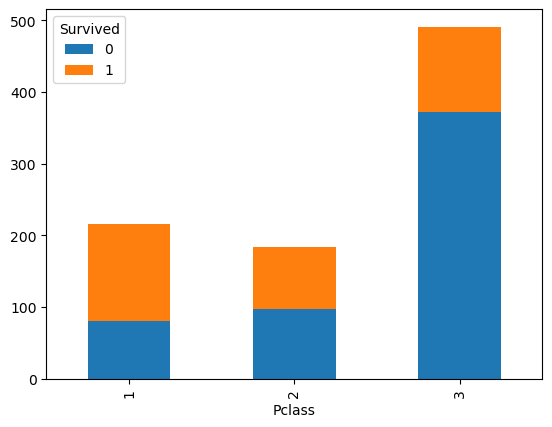

In [55]:
pd.crosstab(data["Pclass"],data["Survived"]).plot(kind="bar",stacked=True)

Text(0.5, 1.0, 'Survived vs Pclass')

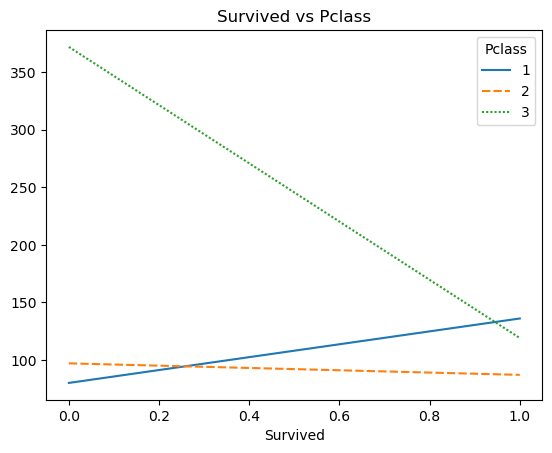

In [56]:
sns.lineplot(pd.crosstab(data["Survived"],data["Pclass"]))
plt.title("Survived vs Pclass")

# Survived vs Sex
## Conclussion

In [57]:
pd.crosstab(data["Survived"],data["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


Text(0.5, 1.0, 'Sex vs Survived')

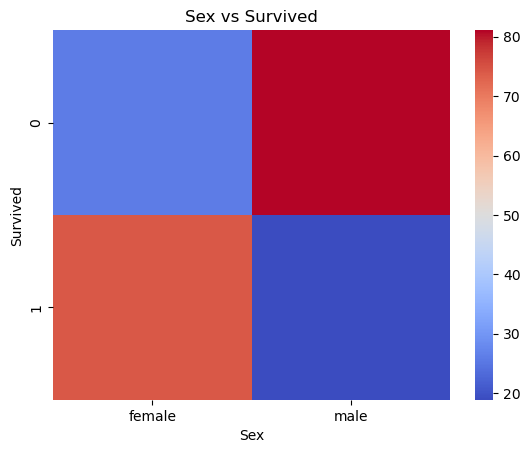

In [58]:
sns.heatmap(pd.crosstab(data["Survived"],data["Sex"],normalize='columns')*100,cmap="coolwarm")
plt.title("Sex vs Survived")

<Axes: xlabel='Survived'>

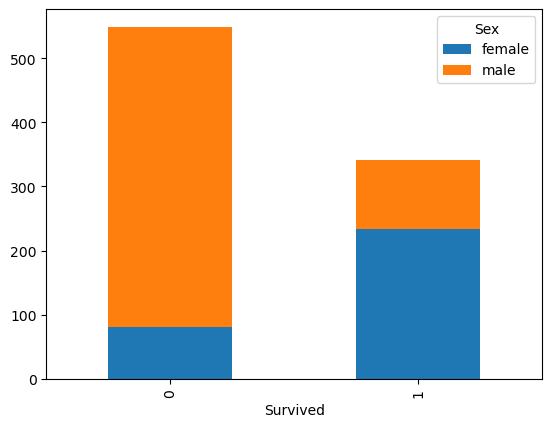

In [59]:
pd.crosstab(data["Survived"],data["Sex"]).plot(kind="bar",stacked=True)

# Survived vs Embarked
## Conclussion

In [60]:
pd.crosstab(data["Survived"],data["Embarked"],normalize="columns")*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

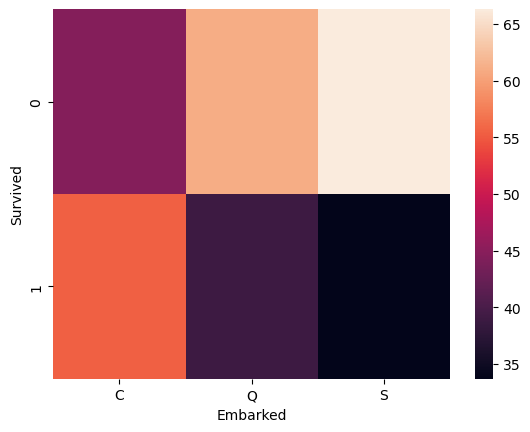

In [61]:
sns.heatmap(pd.crosstab(data["Survived"],data["Embarked"],normalize="columns")*100)

In [62]:
pd.crosstab(data["Pclass"],data["Sex"])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0.5, 1.0, 'Sex vs Pclass')

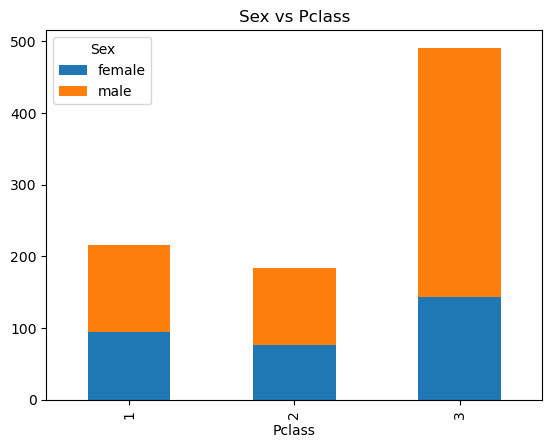

In [63]:
pd.crosstab(data["Pclass"],data["Sex"]).plot(kind="bar",stacked=True)
plt.title("Sex vs Pclass")

# Sex vs Embarked
## Conclussion

<Axes: xlabel='Embarked'>

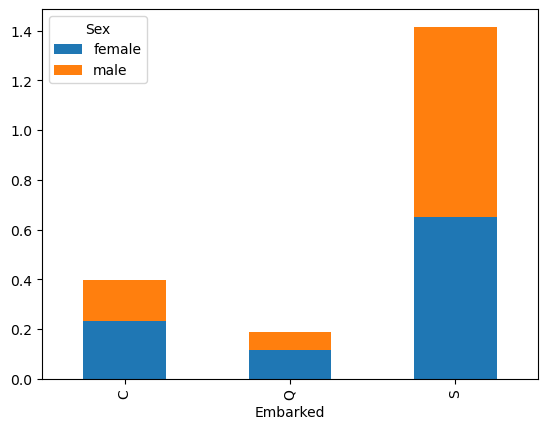

In [64]:
pd.crosstab(data["Embarked"],data["Sex"],normalize="columns").plot(kind="bar",stacked=True)

# Num-Cat
## Survived vs Age

In [65]:
data.groupby(["Survived"])["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

# Survived Vs Fare

In [66]:
data.groupby(["Survived"])["Fare"].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

# Pclass vs Age

In [67]:
data.groupby(['Pclass'])["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Text(0.5, 1.0, 'Pclass vs Age')

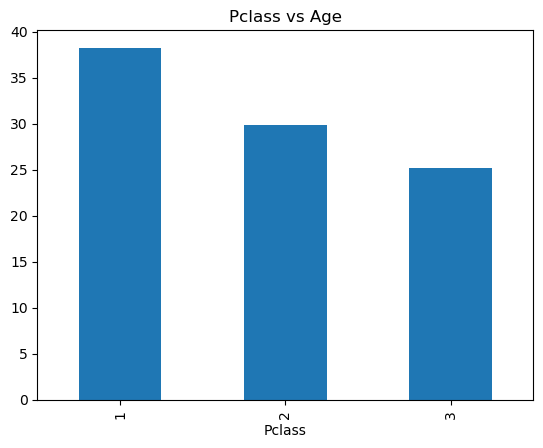

In [68]:
data.groupby(['Pclass'])["Age"].mean().plot(kind="bar")
plt.title("Pclass vs Age")

In [69]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [70]:
data.groupby(["Pclass"])["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

<Axes: xlabel='Pclass'>

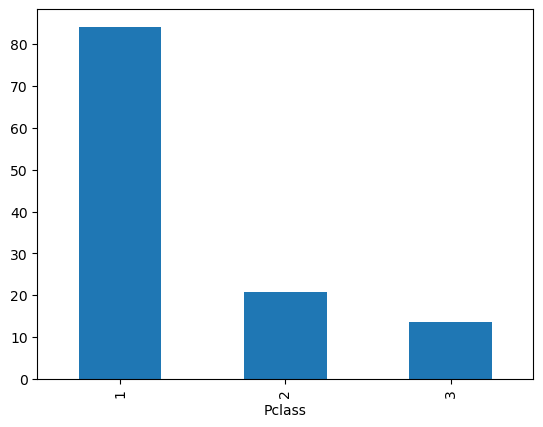

In [71]:
data.groupby(["Pclass"])["Fare"].mean().plot(kind="bar")

# Feature Engineering

In [72]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [73]:
new_df=data.copy()

In [74]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
# new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

In [76]:
# new_df["Age"].plot(kind="kde",label="new_df Age")
# data["Age"].plot(kind="kde",label="old_df Age")
# plt.legend()

## New Family Col

In [77]:
new_df["Family"]=new_df["SibSp"]+new_df["Parch"]+1

<Axes: ylabel='Density'>

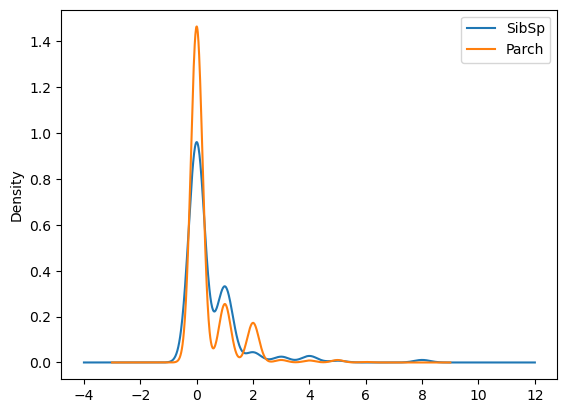

In [78]:
new_df[["SibSp","Parch"]].plot(kind="kde")

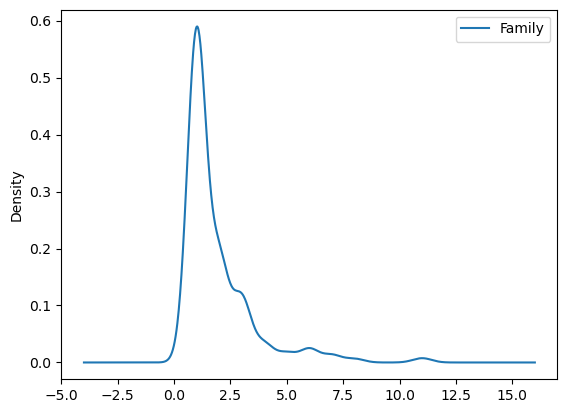

In [79]:
new_df["Family"].plot(kind="kde")
plt.legend()

In [80]:
new_df["Embarked"].isna().sum()

2

In [81]:
new_df["Embarked"].fillna(new_df["Embarked"].mode(),inplace=True)

## Set the individual fare

### We can set the inividual fare by dividing the family col

In [82]:
new_df["Individual_Fare"]=new_df["Fare"]/(new_df["Family"])

In [83]:
new_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500


In [84]:
new_df[["Individual_Fare","Fare"]]

,Individual_Fare,Fare
0,3.62500,7.2500
1,35.64165,71.2833
2,7.92500,7.9250
3,26.55000,53.1000
4,8.05000,8.0500
...,...,...
886,13.00000,13.0000
887,30.00000,30.0000
888,5.86250,23.4500
889,30.00000,30.0000


<Axes: ylabel='Density'>

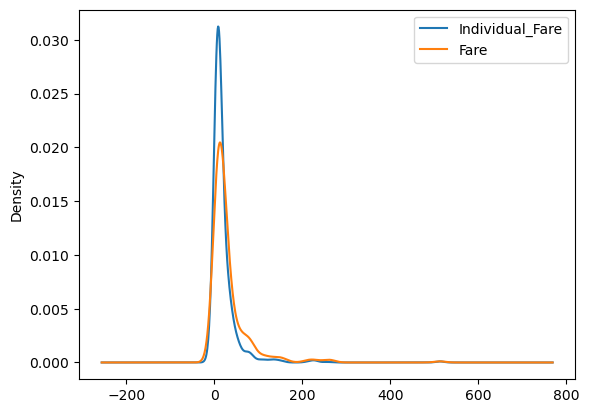

In [85]:
new_df[["Individual_Fare","Fare"]].plot(kind="kde")

**1-** Missing Values in age col **2-** Combine Sib & parch and make a family col **3-** Ticket are in messy form **4-** Missing values in cabin col **5-** Cabin are also  in dirty form **7-** Missing values in Embarked col

## Cabin Missing Values

In [86]:
new_df["Cabin"].isna().sum()

687

## Make a  Colum that contanin the family title

In [87]:
new_df["Family_title"]=new_df["Name"].str.split(",").str.get(0)

## Family col Distrubution

In [88]:
new_df["Family"].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

Text(0.5, 1.0, 'Family')

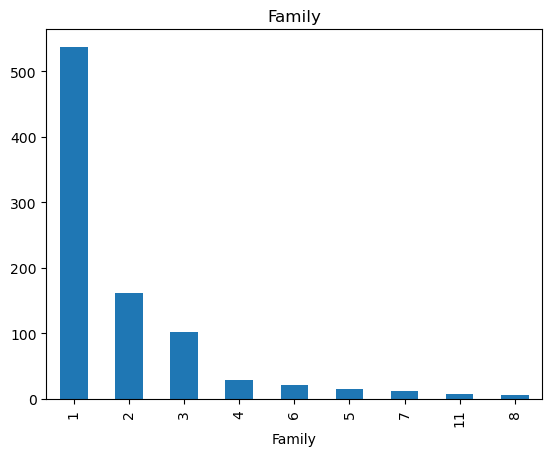

In [89]:
new_df["Family"].value_counts().plot(kind="bar")
plt.title("Family")

In [90]:
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare,Family_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,Allen


In [91]:
def family_size(nbr):
    if(nbr==1):
        return "Alone"
    elif(nbr<5):
        return "small"
    else:
        return  "large"

In [92]:
new_df["Family_size"]=new_df["Family"].apply(family_size)

# Drop unecessary col

In [93]:
new_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Individual_Fare,Family_title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,Braund,small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,Cumings,small


# Family Size vs Survived
## Conclussion
**1-** Died rate is high in Alone and large
**2-** Survived Rate is high in small family

In [94]:
pd.crosstab(new_df["Family_size"],new_df["Survived"])

Survived,0,1
Family_size,,
Alone,374,163
large,52,10
small,123,169


Text(0.5, 1.0, 'Survived vs Family_Size')

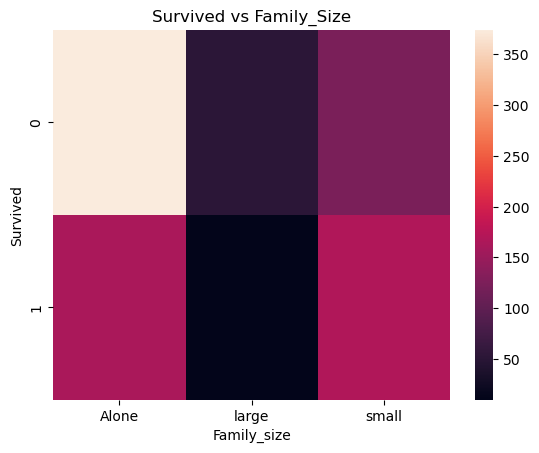

In [95]:
sns.heatmap(pd.crosstab(new_df["Survived"],new_df["Family_size"]))
plt.title("Survived vs Family_Size")

In [96]:
new_df.drop(columns=["Name","SibSp","Parch","Fare","Cabin"],inplace=True)

In [97]:
new_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Embarked,Family,Individual_Fare,Family_title,Family_size
0,1,0,3,male,22.0,A/5 21171,S,2,3.62500,Braund,small
1,2,1,1,female,38.0,PC 17599,C,2,35.64165,Cumings,small
2,3,1,3,female,26.0,STON/O2. 3101282,S,1,7.92500,Heikkinen,Alone
3,4,1,1,female,35.0,113803,S,2,26.55000,Futrelle,small
4,5,0,3,male,35.0,373450,S,1,8.05000,Allen,Alone


In [98]:
new_df.drop(columns=["PassengerId","Ticket"],inplace=True)

In [99]:
new_df["Embarked"].mode()

0    S
Name: Embarked, dtype: category
Categories (3, object): ['C', 'Q', 'S']

In [100]:
new_df["Embarked"].fillna("S",inplace=True)

In [101]:
new_df.isnull().sum()

Survived             0
Pclass               0
Sex                  0
Age                177
Embarked             0
Family               0
Individual_Fare      0
Family_title         0
Family_size          0
dtype: int64

In [102]:
data["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [103]:
new_df["Individual_Fare"].apply(np.sqrt).skew()

2.9330109965276914

In [104]:
new_df["Sur_Name"]=data["Name"].str.split(",").str.get(1).str.split().str.get(0)

In [105]:
new_df["Sur_Name"].value_counts().skew()

3.2501765610257745

<Axes: xlabel='Sur_Name', ylabel='Survived'>

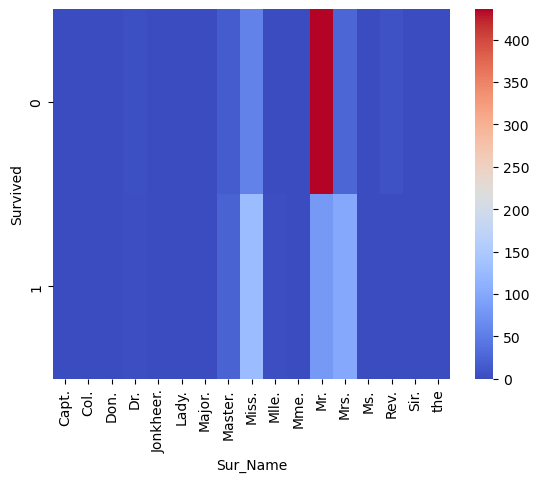

In [106]:
sns.heatmap(pd.crosstab(new_df["Survived"],new_df["Sur_Name"]),cmap="coolwarm")

In [107]:
pd.crosstab(new_df["Survived"],new_df["Sur_Name"])

Sur_Name,Capt.,Col.,Don.,Dr.,Jonkheer.,Lady.,Major.,Master.,Miss.,Mlle.,Mme.,Mr.,Mrs.,Ms.,Rev.,Sir.,the
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


# build a model

In [108]:
new_df.head()

,Survived,Pclass,Sex,Age,Embarked,Family,Individual_Fare,Family_title,Family_size,Sur_Name
0,0,3,male,22.0,S,2,3.62500,Braund,small,Mr.
1,1,1,female,38.0,C,2,35.64165,Cumings,small,Mrs.
2,1,3,female,26.0,S,1,7.92500,Heikkinen,Alone,Miss.
3,1,1,female,35.0,S,2,26.55000,Futrelle,small,Mrs.
4,0,3,male,35.0,S,1,8.05000,Allen,Alone,Mr.


In [109]:
new_df["Family"]=new_df["Family"].astype("int32")

In [110]:
new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

# Saperate the num an dCat col

In [111]:
num_col=['Age',"Individual_Fare","Pclass","Family"]
cat_col=new_df.drop(columns=["Survived"]).columns.difference(num_col)

In [112]:
new_df[cat_col].info()
new_df[num_col].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Embarked      891 non-null    category
 1   Family_size   891 non-null    object  
 2   Family_title  891 non-null    object  
 3   Sex           891 non-null    category
 4   Sur_Name      891 non-null    object  
dtypes: category(2), object(3)
memory usage: 23.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              891 non-null    float64
 1   Individual_Fare  891 non-null    float64
 2   Pclass           891 non-null    int16  
 3   Family           891 non-null    int32  
dtypes: float64(2), int16(1), int32(1)
memory usage: 19.3 KB


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

# Saperate the feature and label

In [114]:
feature=new_df.drop(columns=["Survived"])
label=new_df["Survived"]

In [115]:
x_train,x_test,y_train,y_test=train_test_split(feature,label,test_size=0.2,random_state=2)

In [116]:
x_train.isnull().sum()

Pclass             0
Sex                0
Age                0
Embarked           0
Family             0
Individual_Fare    0
Family_title       0
Family_size        0
Sur_Name           0
dtype: int64

In [117]:
y_test.isnull().sum()

0

In [118]:
new_df[num_col].head(2)

,Age,Individual_Fare,Pclass,Family
0,22.0,3.62500,3,2
1,38.0,35.64165,1,2


# Build a Pipe line

## Impute the missing value

In [119]:
# impute=KNNImputer(n_neighbors=3
# new_df["Age"].fillna(new_df["Age"].mean(),inplace=True)

In [120]:
num_transform=Pipeline(steps=[
#     ("impute",num_col[0]),
    ("Scale",StandardScaler())
])

In [121]:
cat_transform=Pipeline(steps=[
    ("encode",OneHotEncoder(sparse=False,handle_unknown="ignore"))
])

# Build a Transformer

In [122]:
#  (1/√(2πσ2)) (e[-(x-μ)^2]/2σ^2).
def normal_ditrubution(nbr):
    return (1/(np.std(nbr)*(np.sqrt(2*np.pi))))*(np.exp((-0.5)*(nbr-np.mean(nbr)/np.std(nbr))**2))

In [123]:
transformer=ColumnTransformer(transformers=[
#     ("impute",KNNImputer(n_neighbors=5)),
    ("scale",num_transform,num_col),
    ("Age_Fare_Transform",FunctionTransformer(np.log1p),num_col[0:2]),
    ("Remainig_Transform",FunctionTransformer(normal_ditrubution),num_col[2:]),
    ("Ohe",cat_transform,cat_col)
],remainder="passthrough")

# Import Model 

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# model=LogisticRegression()
# model =DecisionTreeClassifier()
model=RandomForestClassifier()

## use pipe lines

In [125]:
pipe=Pipeline([
    ("transform",transformer),
    ("model",model)
])

In [126]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale',
                                                  Pipeline(steps=[('Scale',
                                                                   StandardScaler())]),
                                                  ['Age', 'Individual_Fare',
                                                   'Pclass', 'Family']),
                                                 ('Age_Fare_Transform',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Age', 'Individual_Fare']),
                                                 ('Remainig_Transform',
                                                  FunctionTransformer(func=<function normal_ditrubution at 0x00000211F428AF20>),
                                                  ['Pclass', 'Family']),
                                                 ('Ohe',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Embarked', 'Family_size', 'Family_title', 'Sex', 'Sur_Name'], dtype='object'))])),
                ('model', RandomForestClassifier())])

# Make a prediction

In [127]:
pred=pipe.predict(x_test)

# Check the Accuracy

In [136]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [137]:
error=mean_squared_error(y_test,pred)

In [138]:
error

0.18994413407821228

In [129]:
accuracy=accuracy_score(y_test,pred)

In [135]:
print("Accuracy: ",accuracy)

Accuracy:  0.8100558659217877


# Check the cross val score

In [131]:
from sklearn.model_selection import cross_val_score

In [132]:
score=cross_val_score(pipe,x_train,y_train,cv=5)

In [133]:
score.mean()

0.828631931448833